# ML Clustering - Network Intrusion Detection
## Part 2 - DATA ANALYSIS

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [3]:
# Initialize required variables to read the processed data file
data_file_location = "..\\data\\processed\\"
data_file_name = "kddcup99_processed"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

In [4]:
# Check the dataset and its shape
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.160834,-0.011424,1.224727,-0.002678,-0.001012,-0.002245,-0.053075,-0.007497,0.628587,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062324,-0.276414,-0.339775,-0.058119,-0.065411,-0.24433,-0.246821,0.160595,-0.157994,-0.47852,-1.439355,-2.318624,-2.758826,-0.313580,-0.480322,-0.478599,-0.070638,-0.057378,-0.256668,-0.255536,-0.125545,0.517976,-0.493782,-0.191559,-0.250813,-0.201514,0.759516,-0.247932,-0.288046,-0.329062,-0.003649,-0.241214,-0.024903,-0.001012,-0.018694,-0.034980,-0.023263,-0.01252,-0.006865,0.247998,-0.002024
1,-0.160834,-0.011905,0.038174,-0.002678,-0.001012,-0.002245,-0.053075,-0.007497,0.628587,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062324,-0.244116,-0.309216,-0.058119,-0.065411,-0.24433,-0.246821,0.160595,-0.157994,-0.47852,-1.429686,-2.307142,0.508211,-0.313580,3.027573,-0.478599,-0.070638,-0.057378,-0.256668,-0.255536,-0.125545,0.517976,-0.493782,-0.191559,-0.250813,-0.201514,0.759516,-0.247932,-0.288046,-0.329062,-0.003649,-0.241214,-0.024903,-0.001012,-0.018694,-0.034980,-0.023263,-0.01252,-0.006865,0.247998,-0.002024
2,-0.160834,-0.011234,-0.058394,-0.002678,-0.001012,-0.002245,-0.053075,-0.007497,0.628587,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062324,-0.276414,-0.339775,-0.058119,-0.065411,-0.24433,-0.246821,0.160595,-0.157994,-0.47852,-1.420017,-2.295661,0.508211,-0.313580,1.273625,-0.478599,-0.070638,-0.057378,-0.256668,-0.255536,-0.125545,0.517976,-0.493782,-0.191559,-0.250813,-0.201514,0.759516,-0.247932,-0.288046,-0.329062,-0.003649,-0.241214,-0.024903,-0.001012,-0.018694,-0.034980,-0.023263,-0.01252,-0.006865,0.247998,-0.002024
3,-0.160834,-0.011261,-0.034866,-0.002678,-0.001012,-0.002245,-0.053075,-0.007497,0.628587,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062324,-0.244116,-0.309216,-0.058119,-0.065411,-0.24433,-0.246821,0.160595,-0.157994,-0.47852,-1.410348,-2.284180,0.508211,-0.313580,0.677283,-0.478599,-0.070638,-0.057378,-0.256668,-0.255536,-0.125545,0.517976,-0.493782,-0.191559,-0.250813,-0.201514,0.759516,-0.247932,-0.288046,-0.329062,-0.003649,-0.241214,-0.024903,-0.001012,-0.018694,-0.034980,-0.023263,-0.01252,-0.006865,0.247998,-0.002024
4,-0.160834,-0.011207,-0.080107,-0.002678,-0.001012,-0.002245,-0.053075,-0.007497,0.628587,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062324,-0.211817,-0.278657,-0.058119,-0.065411,-0.24433,-0.246821,0.160595,-0.157994,-0.47852,-1.400679,-2.272699,0.508211,-0.313580,0.396652,-0.478599,-0.070638,-0.057378,-0.256668,-0.255536,-0.125545,0.517976,-0.493782,-0.191559,-0.250813,-0.201514,0.759516,-0.247932,-0.288046,-0.329062,-0.003649,-0.241214,-0.024903,-0.001012,-0.018694,-0.034980,-0.023263,-0.01252,-0.006865,0.247998,-0.002024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976153,-0.160834,-0.013373,-0.094329,-0.002678,-0.001012,-0.002245,-0.053075,-0.007497,-1.590

As discussed in the previous phase, the dataset is now ready for analysis using PCA and KMeans clustering.

### 3. PRINCIPLE COMPONENT ANALYSIS (PCA)

The original dataset along with the performed preprocessing tasks has led to a relatively high number of variables, this may pose additional unnecessary overload during the clustering analysis. Specifically that some variables might not as much useful and may contain no relevant information to perform the clustering.

The goal of PCA is to convert the high dimensional data distribution into a lower, more compact space. Namely by calculating new variables (so called principle components) that represent the most important attributes in the original datasets.

Since the PCA includes distance-based calculations, our dataset was prepared by converting all attributes into a standardized version, maintaining the value distribution in a normalized scale.

*One last note, PCA is primarily designed to work with numerical (quantitative) variables. At the same time, our dataset has three categorical features which were encoded into binary vectors. This might not perfectly fit the use case of PCA and there are many discussions regarding the applicability of PCA on categorical (qualitative) features. However, since the main objective of this project is to demonstrate some experiments of several data analysis techniques/algorithms, we will proceed with PCA keeping in mind that in more realistic scenarios a deeper analysis will be definitely recommended.*

In [5]:
# Initialize the PCA analyzer
pca = PCA()

# Fit the PCA on our dataset and implement transformations
pca_results = pca.fit_transform(data)

# Print the number of resulting components
print(f"Number of Principle Components: {pca.n_components_}")

# Print the explained variance ration for each components, which represent how much variance the resulting component hold in the dataset. 
print(pca.explained_variance_ratio_)

# Save transformed data into a new DataFrame
data_pca_all = pd.DataFrame(pca_results, columns=pca.get_feature_names_out())


Number of Principle Components: 58
[1.18444428e-01 1.02087267e-01 6.97181654e-02 5.07070757e-02
 4.25866990e-02 4.09466473e-02 3.46682969e-02 3.01731310e-02
 2.76361507e-02 2.38507160e-02 2.18457867e-02 2.06226915e-02
 2.04844696e-02 2.00886373e-02 1.85654187e-02 1.78183082e-02
 1.77384030e-02 1.75590804e-02 1.73282906e-02 1.72544070e-02
 1.72419818e-02 1.72405282e-02 1.72379030e-02 1.72088673e-02
 1.69834537e-02 1.69430685e-02 1.66552450e-02 1.65842393e-02
 1.62089320e-02 1.48263903e-02 1.37481964e-02 1.34477997e-02
 1.09998801e-02 9.11455895e-03 8.46600934e-03 7.98525021e-03
 7.58197673e-03 5.09800969e-03 3.95160084e-03 3.73548441e-03
 3.12593844e-03 3.04737481e-03 2.44567477e-03 1.97484755e-03
 1.63134761e-03 1.37783312e-03 1.26055415e-03 1.19055203e-03
 7.78598371e-04 6.20015761e-04 5.86174274e-04 2.94805403e-04
 2.08866340e-04 4.43658510e-05 2.96063648e-05 7.15449945e-32
 2.07415362e-32 1.03384907e-32]


Since we didn't specify the required number of components, nor did we instruct the PCA algorithm to maintain a minimum variance threshold, the resulting components are equal to the dataset attributes.

The results indicated that 12% of the variance is maintained in the 1st component, 10% in the 2nd component, 7% in the third one, and so on. Meaning that almost 30% of the information can be obtained only from the first 3 components alone.

Accordingly, it might be a good idea now to try to plot the data using the first three components to get an initial understanding of the samples distribution.

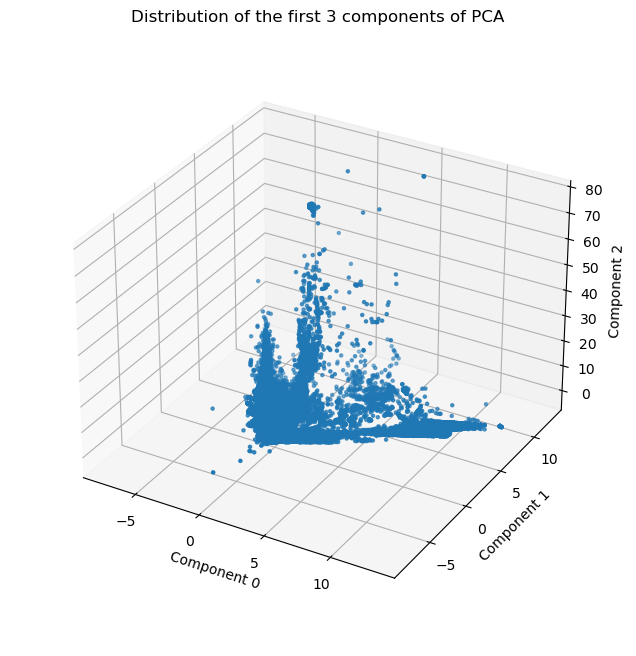

In [6]:
# Plot the first 3 components of PCA results on a 3d chart

# Create a 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

# Scatter plot with filtered data
ax.scatter3D(data_pca_all["pca0"], data_pca_all["pca1"], data_pca_all["pca2"], marker='.')

# Set title for the plot
plt.title("Distribution of the first 3 components of PCA")

# Set labels for axes
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")

ax.set_box_aspect(aspect=None, zoom=.9)
plt.show()

As we can observe in this 3d chart, we started to see some notion of grouping in the dataset, considering we are only considering 30% of the variance represented in the first 3 components.

We can also notice some outliers outspread far from the focus of other data points, that can be interpreted as abnormal or malicious connection samples in the dataset.

There are almost 1M samples presented in this chart, many of them are packed and stacked on top of each other making it quite difficult to identify separate data groups. However, let's try to plot only part of the samples with a limited scope of the axis.

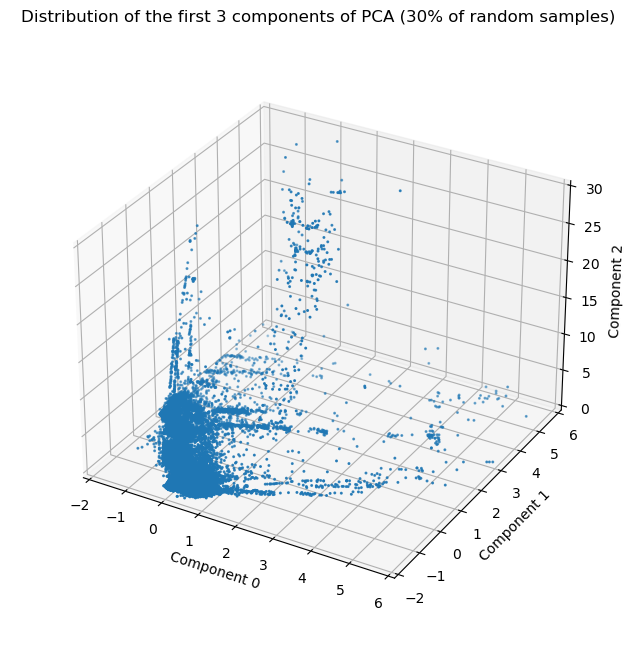

In [7]:
# Randomly sample a fraction of the data
sample_fraction = 0.3
data_pca_all_sampled = data_pca_all.sample(frac=sample_fraction)

# Define limits for the plot
x_limit = [-2, 6]
y_limit = [-2, 6]
z_limit = [0, 30]

# Filter data based on limits
data_pca_all_filtered = data_pca_all_sampled[
    (data_pca_all_sampled['pca0'] >= x_limit[0]) & (data_pca_all_sampled['pca0'] <= x_limit[1]) &
    (data_pca_all_sampled['pca1'] >= y_limit[0]) & (data_pca_all_sampled['pca1'] <= y_limit[1]) &
    (data_pca_all_sampled['pca2'] >= z_limit[0]) & (data_pca_all_sampled['pca2'] <= z_limit[1])
]

# Create a 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

# Scatter plot with filtered data
ax.scatter3D(data_pca_all_filtered["pca0"], data_pca_all_filtered["pca1"], data_pca_all_filtered["pca2"], marker='.', s=5)

# Set title for the plot
plt.title("Distribution of the first 3 components of PCA (30% of random samples)")

# Set labels for axes
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")

# Set limits for the plot
ax.set_xlim(x_limit)
ax.set_ylim(y_limit)
ax.set_zlim(z_limit)

ax.set_box_aspect(aspect=None, zoom=.9)
plt.show()

This figure represents a zoomed in version of the previous chart, with only 30% randomly selected samples and having limits applied to the three considered axes.

Despite the data are still packed in the center, the closer look revealed better overview of some groups that started to form in different areas of the chart.

Surely it's quite early to perfectly classify the data points in this chart, as the final clustering would rely on information still hidden in the remaining principle components.  

Since the main goal of PCA is to reduce data dimensionality, we will utilize it to git red of the least important components that don't hold much variance and hence don't contribute to the data analysis.

In [8]:
# Initialize the PCA analyzer to maintain 90% of the information
pca = PCA(n_components=.9, svd_solver="full")

# Fit the PCA and implement transformations
pca_results = pca.fit_transform(data)

# Print the number of resulting components
print(f"Number of Principle Components: {pca.n_components_}")

# Print the explained variance ratio for each components, which represents how much variance the resulting component holds in the dataset. 
print(pca.explained_variance_ratio_)

# Save transformed data into a new DataFrame
data_pca = pd.DataFrame(pca_results, columns=pca.get_feature_names_out())

Number of Principle Components: 31
[0.11844443 0.10208727 0.06971817 0.05070708 0.0425867  0.04094665
 0.0346683  0.03017313 0.02763615 0.02385072 0.02184579 0.02062269
 0.02048447 0.02008864 0.01856542 0.01781831 0.0177384  0.01755908
 0.01732829 0.01725441 0.01724198 0.01724053 0.0172379  0.01720887
 0.01698345 0.01694307 0.01665524 0.01658424 0.01620893 0.01482639
 0.0137482 ]


These results show that 90% of the information is retained in 31 principle components, near to half of all components. This indicates a significant dimensionality reduction of  a decrease of almost 50% from the original data attributes.

### 4. SELECT BEST K VALUE (ELBOW METHOD)

As we know, deciding the number of clusters in the dataset is not an easy and straight forward problem, and the K itself is a hyper parameter for KMean algorithm which may take any arbitrary value.

Elbow Method is a technique used to determine the optimal number of clusters (k) for a given dataset. The method involves running the KMeans clustering algorithm for a range of values of k and plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters. The WCSS is a measure of the compactness of the clusters; it is the sum of the squared distances between each data point and the centroid of its assigned cluster.

In [11]:
# Set the range of k values
min_k, max_k = (1,20)

# Initialize the within-cluster sum of squares vector
wcss = []

# Iterate through k values
for i in range(min_k, max_k+1):
    # Run KMeans for the current k
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca)
    
    # Append the wcss of the current clustering solution
    wcss.append(kmeans.inertia_)

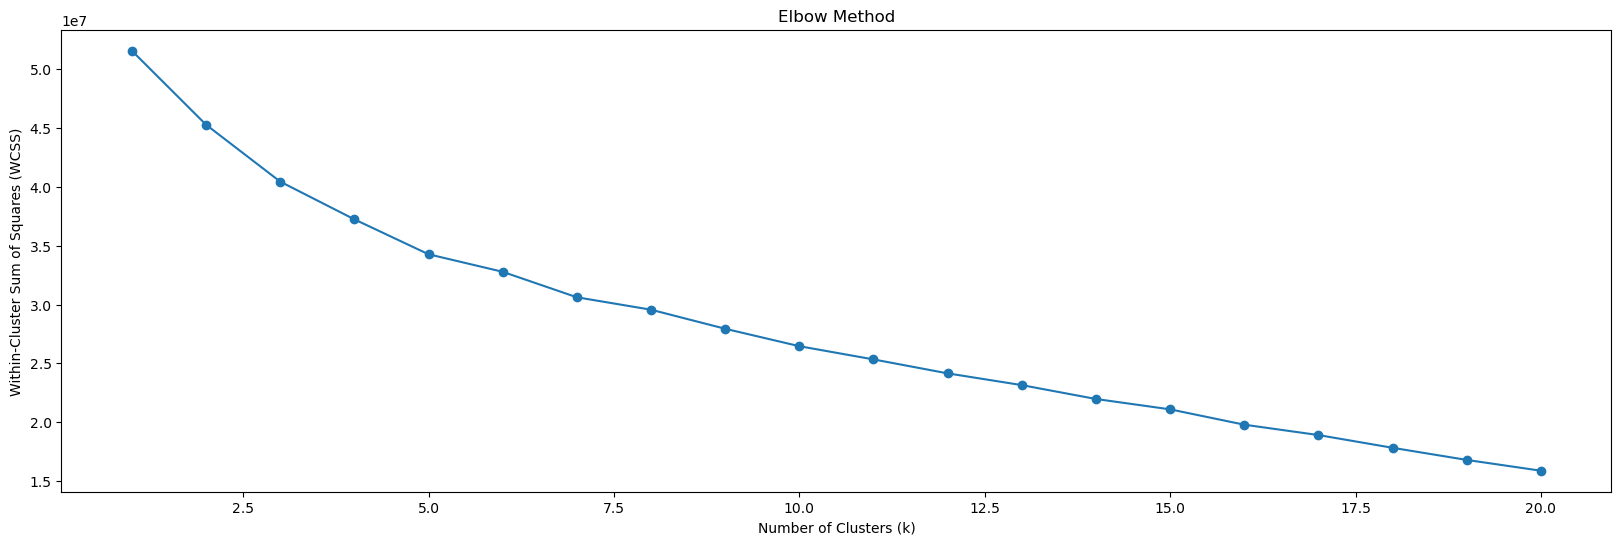

In [12]:
# Create a figure
plt.figure(figsize=(20,6))

# Plot inertia value for each k iteration
plt.plot(range(min_k, max_k+1), wcss, marker='o')

# Set plot title and labels
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Show the plot
plt.show()

Expectedly, we observe a declining trend indicating the decrease in wcss values when considering more clusters. This is quite understandable since the very high number of clusters leads to each point being represented in its own cluster.

The idea of obtaining the optimal k value is to find a compromise between number of clusters and wcss.

From the chart above, we observe some sort of significant decline down until k=5, when afterwards the line starts to flatten with lower variations in the wcss. Accordingly, we may consider this value as the best number of clusters for this dataset. 

### 5. IMPLEMENTING KMEANS

As discussed in the previous step, the Elbow Method suggested a trade-off k value. It's the time now to implement KMeans algorithm and explore how the clustering will look like for our dataset.

In [20]:
# Set the best k
bestK = 5

# Implement KMeans algorithm on our dataset using the best k value
kmeans = KMeans(n_clusters=bestK, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_pca)

In [21]:
# Add generated clusters to the dataset
data_pca["cluster"] = clusters

Text(0, 0.5, 'Samples Count')

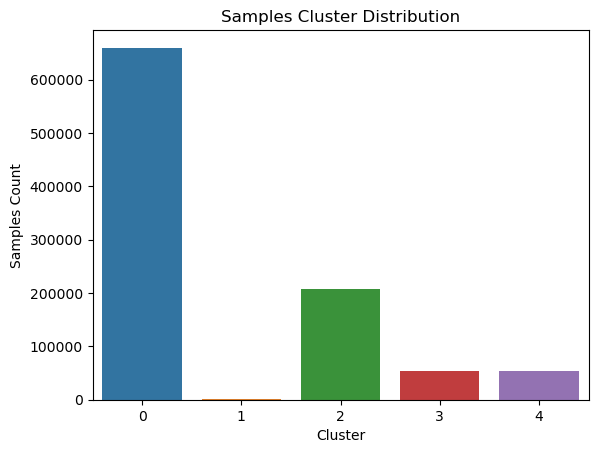

In [22]:
# Check sample distribution of generated clusters
sns.countplot(data=data_pca, x="cluster")
plt.title("Samples Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Samples Count")

The distribution chart shows that more than 50% of samples belong to one cluster, while the remaining samples are unequally distributed among other groups. We also notice one cluster with a very low number of observations, which may refer to an isolated group of data points with similar features.

To have a look of how the clustering split the dataset, we can plot again the pca results using the first three components.

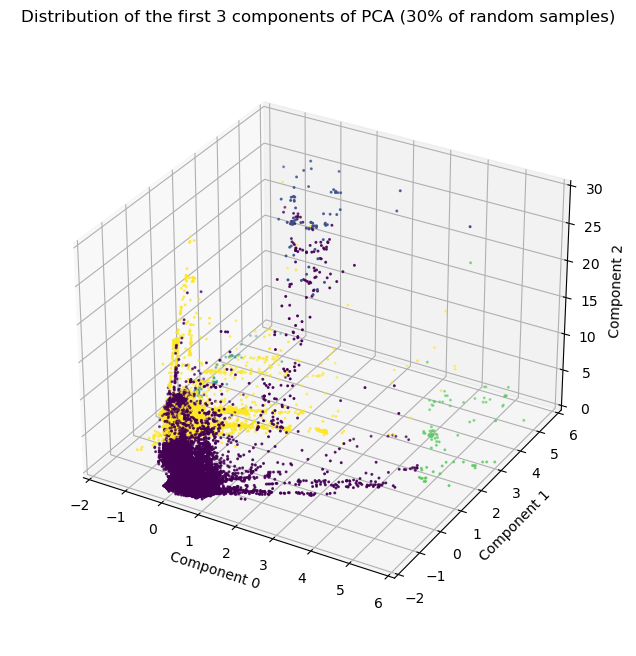

In [23]:
# Randomly sample a fraction of the data
sample_fraction = 0.3
data_pca_sampled = data_pca.sample(frac=sample_fraction)

# Define limits for the plot
x_limit = [-2, 6]
y_limit = [-2, 6]
z_limit = [0, 30]

# Filter data based on limits
data_pca_filtered = data_pca_sampled[
    (data_pca_sampled['pca0'] >= x_limit[0]) & (data_pca_sampled['pca0'] <= x_limit[1]) &
    (data_pca_sampled['pca1'] >= y_limit[0]) & (data_pca_sampled['pca1'] <= y_limit[1]) &
    (data_pca_sampled['pca2'] >= z_limit[0]) & (data_pca_sampled['pca2'] <= z_limit[1])
]

# Create a 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

# Scatter plot with filtered data
ax.scatter3D(data_pca_filtered["pca0"], data_pca_filtered["pca1"], data_pca_filtered["pca2"], marker='.', s=5, c=data_pca_filtered["cluster"])

# Set title for the plot
plt.title("Distribution of the first 3 components of PCA (30% of random samples)")

# Set labels for axes
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")

# Set limits for the plot
ax.set_xlim(x_limit)
ax.set_ylim(y_limit)
ax.set_zlim(z_limit)

ax.set_box_aspect(aspect=None, zoom=.9)
plt.show()

This plot shows how the samples are distributed among the generated clusters, we see two main clusters dominating the majority of samples with other smaller clusters combining the remaining samples.

This chart alone is not enough to understand or evaluate the cluster distribution since it encompasses the first 3 components, nevertheless, it partially shows how KMeans results were able to separate the dataset into similar groups.

### 6. ANOMALY DETECTION

The ultimate goal of clustering our dataset is to spot unusual data points which are different from the other normal connections. Having all samples grouped into separate clusters indicates similarities between them. 

However, the far the data point is from the cluster centroid the less similar it is to other cluster samples, and thus, the more likely this data point is to be an outlier.

Accordingly, in order to detect outliers in a clustered data set, we may rely on a minimum threshold of how far the suspicious sample is from its cluster's centroid. To do so, we need first to calculate the distance between each sample from its assigned cluster.

In [24]:
# Calculate distance of each data point to its cluster centroid
distances = kmeans.transform(data_pca)

# Extract the distance to the corresponding cluster for each data point
data_pca['distance_to_centroid'] = distances[range(len(data_pca)), kmeans.labels_]

# Check how the data frame looks like with cluster details
data_pca.head(10)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,cluster,distance_to_centroid
0,-0.528093,-0.118288,0.055973,2.108027,-0.082369,-0.322786,0.169211,-0.183892,-0.367292,0.884615,0.194509,0.185250,0.692267,0.234429,0.283507,-0.067824,0.182137,0.013994,0.021665,0.030603,0.001890,0.009992,0.028746,-0.020831,-0.183241,-0.032214,-0.358781,0.013227,-0.067136,-0.059365,-0.931194,0,2.941817
1,-0.175356,-0.004067,-0.162498,1.716532,-0.153886,-0.369617,-0.888789,0.266606,-0.568794,0.718777,0.336654,0.174392,-0.125419,-0.284922,1.007120,-0.279802,0.289469,-0.038503,-0.151120,0.086351,0.020091,0.003902,0.080001,-0.057125,-0.259283,-0.045151,-0.443692,-0.350712,-0.078661,-0.051515,0.483032,0,2.818650
2,-0.052089,-0.476917,-0.080037,1.477699,-0.154217,-0.224467,-0.443461,0.174047,-0.321163,0.602325,0.254710,0.083384,-0.134521,-0.218032,0.718052,-0.247349,0.292830,-0.034328,-0.097491,0.070617,0.012684,0.008070,0.062811,-0.025924,-0.216904,-0.043605,-0.386858,-0.234212,-0.048685,-0.039876,0.358179,0,2.075074
3,-0.013136,-0.642263,-0.046444,1.373404,-0.139928,-0.204054,-0.319438,0.137071,-0.248825,0.553872,0.224108,0.061054,-0.101984,-0.177745,0.608633,-0.227602,0.284598,-0.031129,-0.075645,0.063655,0.010178,0.009290,0.055655,-0.015982,-0.199495,-0.041230,-0.359538,-0.189054,-0.038011,-0.045335,0.280106,0,1.816331
4,0.003918,-0.721103,-0.029624,1.311207,-0.133196,-0.204923,-0.271700,0.115571,-0.219401,0.515391,0.214053,0.028818,-0.113657,-0.173657,0.550469,-0.215261,0.278914,-0.029327,-0.065349,0.059974,0.009005,0.009979,0.052046,-0.008638,-0.189724,-0.040042,-0.345756,-0.161106,-0.030761,-0.047237,0.279828,0,1.693324
5,0.013726,-0.772864,-0.017051,1.266184,-0.122361,-0.213404,-0.250005,0.102323,-0.203789,0.493889,0.204265,0.022450,-0.092243,-0.155983,0.511106,-0.204482,0.271413,-0.027446,-0.057167,0.057027,0.008256,0.010249,0.049206,-0.005532,-0.182617,-0.038445,-0.333380,-0.143892,-0.026994,-0.052719,0.246145,0,1.604900
6,0.018664,-0.805279,-0.008299,1.230295,-0.113670,-0.226578,-0.245219,0.092297,-0.197747,0.473642,0.199504,0.011828,-0.084026,-0.148160,0.483016,-0.195413,0.264671,-0.025915,-0.051672,0.054835,0.007806,0.010418,0.047184,-0.002768,-0.177202,-0.037167,-0.324230,-0.130153,-0.023827,-0.057080,0.233875,0,1.545415
7,0.023601,-0.837678,0.000441,1.194379,-0.105037,-0.239748,-0.240428,0.082244,-0.191709,0.453274,0.194802,0.000949,-0.076227,-0.140563,0.454909,-0.186352,0.257951,-0.024388,-0.046194,0.052645,0.007355,0.010590,0.045165,0.000026,-0.171785,-0.035896,-0.315108,-0.116368,-0.020638,-0.061397,0.222148,0,1.486971
8,0.026107,-0.860558,0.007388,1.163306,-0.096895,-0.255310,-0.244145,0.074073,-0.190415,0.434743,0.192034,-0.009477,-0.070784,-0.135620,0.432585,-0.178065,0.251365,-0.022986,-0.041907,0.050801,0.007052,0.010689,0.043518,0.002354,-0.167219,-0.034717,-0.307326,-0.104760,-0.017950,-0.065567,0.215963,0,1.442267
9,0.026259,-0.876347,0.014397,1.141411,-0.080092,-0.273978,-0.257225,0.072065,-0.193176,0.436857,0.182112,0.020748,-0.001885,-0.098002,0.418447,-0.169305,0.241305,-0.020969,-0.036409,0.048810,0.006869,0.010383,0.041677,-0.000452,-0.163706,-0.032502,-0.296587,-0.102240,-0.019033,-0.076216,0.132975,0,1.404159


Looking at the last two columns, we notice two additional details, the sample's cluster and its distance from the cluster centroid. Based on a defined threshold, the distance column can be used to determine if each sample is an outlier of not.

Determining the distance threshold in not an easy task and it highly impacts the anomaly detection results. One approach to do so is to observe the top farthest data points and then try to find a split in their distances.

In [25]:
# Get the farthest 1000 samples from their centroids
farthest_1000_samples = data_pca.nlargest(1000, 'distance_to_centroid')

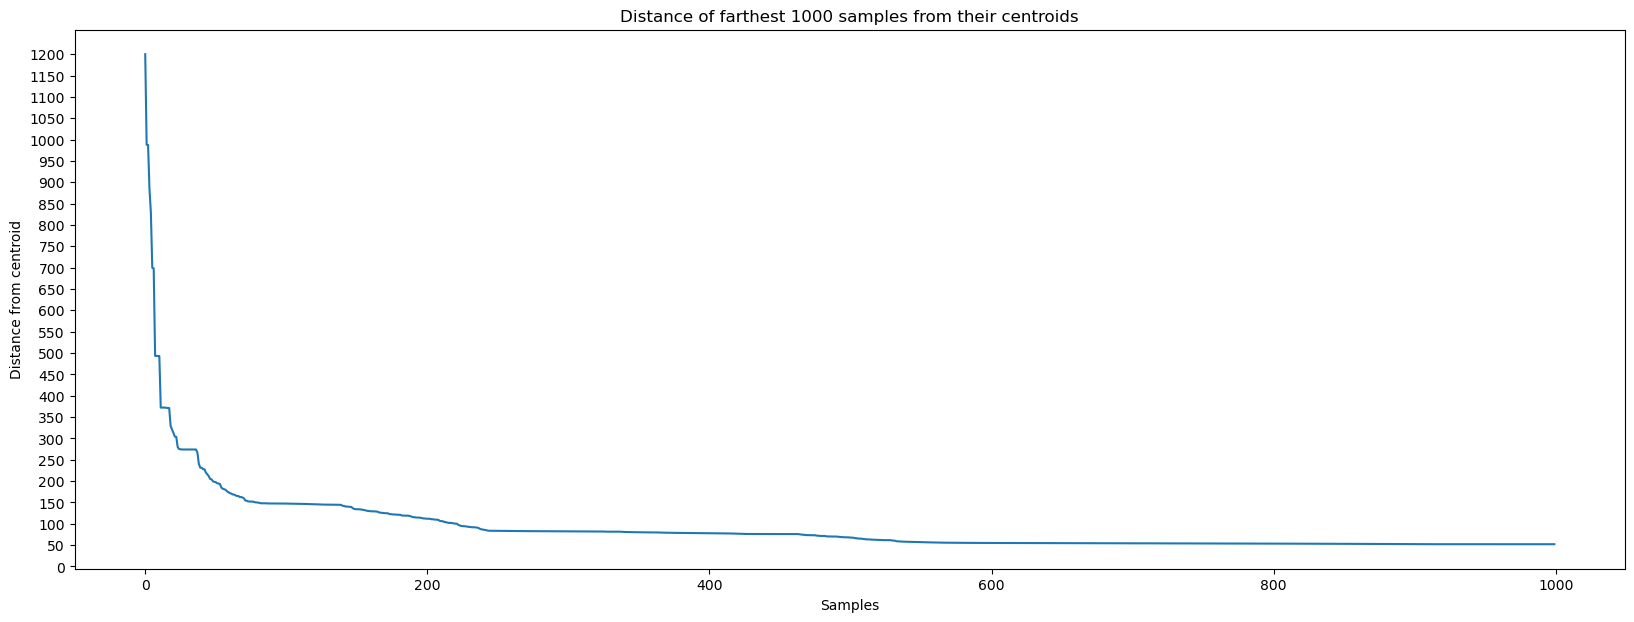

In [26]:
# Plot the samples with their distances
plt.figure(figsize=((20,7)))
plt.plot(range(len(farthest_1000_samples)), farthest_1000_samples["distance_to_centroid"])
plt.title("Distance of farthest 1000 samples from their centroids")
plt.xlabel("Samples")
plt.ylabel("Distance from centroid")
plt.yticks(np.arange(0, max(farthest_1000_samples["distance_to_centroid"]) + 1, 50))
plt.show()


The previous chart shows a declining trend representing the decreased distance of samples since they are plotted sorted in a descending order. 

To determine a threshold, we can pick a distance value on this chart where the majority of samples fall below it. For instance, distance=100, since this value splits the figure into two distinct groups, the one to the left with higher distance values, and the other samples to the right with relatively small distance from their centroid.

Having that said, we believe a distance threshold of 100 will be suitable to divide the anomalous connections from the normal ones, and thus can be used to spot the intrusions in this version of the dataset.